# Análisis Exploratorio de Datos

In [249]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [209]:
# Import 4 databases
filepath1 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceCiprofloxacinLoose.tsv.gz'
filepath2 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceCiprofloxacinStrict.tsv.gz'
filepath3 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceMeropenemLoose.tsv.gz'
filepath4 = '/home/jupyter-user7/CAMDA/Camda24_resistance/DataSets/ResistanceMeropenemStrict.tsv.gz'

resis_cipro_L = pd.read_csv(filepath1, sep='\t', compression='gzip')
resis_cipro_S = pd.read_csv(filepath2, sep='\t', compression='gzip')
resis_mero_L = pd.read_csv(filepath3, sep='\t', compression='gzip')
resis_mero_S = pd.read_csv(filepath4, sep='\t', compression='gzip')

/tmp/ipykernel_1725917/2616150320.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_cipro_L = pd.read_csv(filepath1, sep='\t', compression='gzip')
/tmp/ipykernel_1725917/2616150320.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_cipro_S = pd.read_csv(filepath2, sep='\t', compression='gzip')
/tmp/ipykernel_1725917/2616150320.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  resis_mero_L = pd.read_csv(filepath3, sep='\t', compression='gzip')


In [210]:
# First view to the databases
print("Cipro Loose size:", resis_cipro_L.shape, 
      "\nCipro Strict size:", resis_cipro_S.shape, 
      "\nMerop Loose size:", resis_mero_L.shape, 
      "\nMerop Strict size:", resis_mero_S.shape)

Cipro Loose size: (3881, 5570) 
Cipro Strict size: (3881, 880) 
Merop Loose size: (3891, 5570) 
Merop Strict size: (3891, 880)


# Ciprofloxacin Resistance Loose Database

In [211]:
# Ciprofloxacin Loose Resistance database
resis_cipro_L.tail()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
3876,SRR3242343,Salmonella,enterica,NaN,NaN,27.0,18.0,25.0,15.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3877,SRR2082856,Salmonella,enterica,NaN,NaN,28.0,17.0,27.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3878,SRR3242362,Salmonella,enterica,NaN,NaN,25.0,20.0,29.0,23.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3879,SRR1257300,Salmonella,enterica,NaN,NaN,25.0,18.0,27.0,23.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3880,SRR4280580,Salmonella,enterica,NaN,NaN,27.0,18.0,29.0,20.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [212]:
# Counting NaN values
resis_cipro_L.isnull().sum()

accession           0
genus               0
species             0
phenotype        1063
mic              1063
                 ... 
3005106-A352E       0
3003937-N514H       0
3003937-L546V       0
3003304-E540V       0
3003304-E504V       0
Length: 5570, dtype: int64

In [218]:
# To extract train data
resis_cipro_L_Train = resis_cipro_L.copy()
resis_cipro_L_Train = resis_cipro_L_Train.dropna()
resis_cipro_L_Train.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,19.0,10.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,19.0,6.0,7.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,20.0,8.0,6.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
# Visualize train data without nan values
resis_cipro_L_Train.isnull().sum()

accession        0
genus            0
species          0
phenotype        0
mic              0
                ..
3005106-A352E    0
3003937-N514H    0
3003937-L546V    0
3003304-E540V    0
3003304-E504V    0
Length: 5570, dtype: int64

In [217]:
# To know data sets dimentions
print("Cipro Loose size:", resis_cipro_L.shape, "\nCipro Loose training size:", resis_cipro_L_Train.shape)

Cipro Loose size: (3881, 5570) 
Cipro Loose training size: (2818, 5570)


In [255]:
# # To extract test data
resis_cipro_L_Test = resis_cipro_L.copy()
resis_cipro_L_Test = resis_cipro_L_Test[resis_cipro_L_Test['phenotype'].isna()]
resis_cipro_L_Test.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
2818,ERR1417717,Escherichia,coli,NaN,NaN,32.0,24.0,23.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2819,ERR1417719,Escherichia,coli,NaN,NaN,32.0,24.0,23.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2820,ERR1417722,Escherichia,coli,NaN,NaN,32.0,25.0,20.0,25.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2821,ERR1417741,Escherichia,coli,NaN,NaN,31.0,25.0,21.0,22.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2822,ERR1417745,Escherichia,coli,NaN,NaN,33.0,24.0,19.0,23.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [220]:
# Print data base dimentions
print("Cipro Loose size:", resis_cipro_L.shape, "\nCipro Loose test size:", resis_cipro_L_Test.shape)

Cipro Loose size: (3881, 5570) 
Cipro Loose test size: (1063, 5570)


In [232]:
# Check for class ditribution in phenotype
class_counts1 = resis_cipro_L_Train['phenotype'].value_counts()
print(class_counts1)

phenotype
Susceptible    2604
Resistant       214
Name: count, dtype: int64


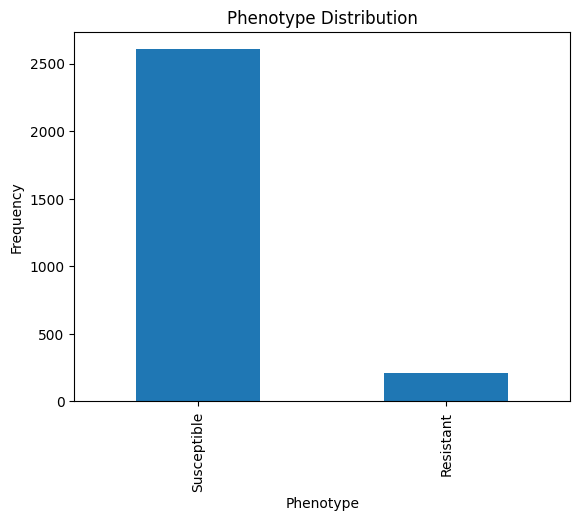

In [233]:
# plot ditribution phenotype
class_counts1.plot(kind='bar')
plt.xlabel('Phenotype')
plt.ylabel('Frequency')
plt.title('Phenotype Distribution')
plt.show()

In [230]:
# Check class ditribution in genus
class_counts2 = resis_cipro_L_Train['genus'].value_counts()
print(class_counts2)

genus
Salmonella       2165
Campylobacter     475
Neisseria         178
Name: count, dtype: int64


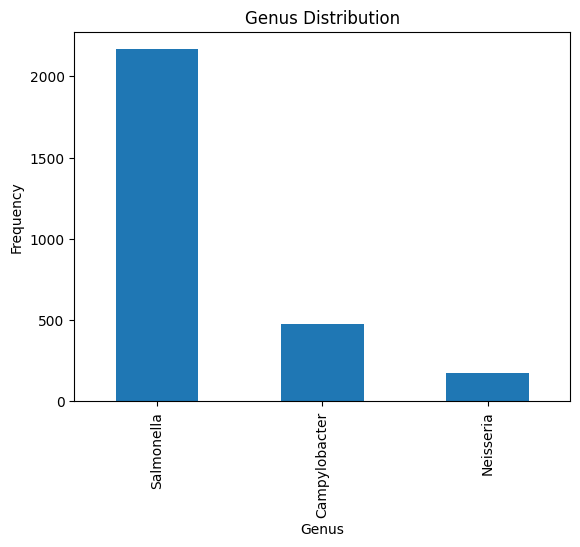

In [234]:
# plot genus ditribution
class_counts2.plot(kind='bar')
plt.xlabel('Genus')
plt.ylabel('Frequency')
plt.title('Genus Distribution')
plt.show()

In [238]:
# Check class ditribution in species
class_counts3 = resis_cipro_L_Train['species'].value_counts()
print(class_counts3)

species
enterica       2165
jejuni          475
gonorrhoeae     178
Name: count, dtype: int64


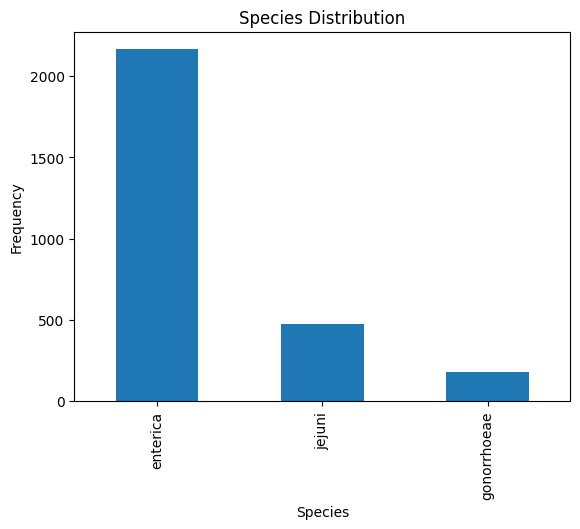

In [239]:
# plot species ditribution
class_counts3.plot(kind='bar')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.title('Species Distribution')
plt.show()

In [240]:
# Check class ditribution in mic
class_counts4 = resis_cipro_L_Train['mic'].value_counts()
print(class_counts4)

mic
0.015     1757
0.030      391
0.060      260
0.120       91
16.000      71
8.000       57
4.000       54
0.004       40
0.250       19
1.000       18
32.000      13
0.016       11
2.000        9
0.002        8
0.500        6
64.000       4
0.008        3
0.032        3
0.063        1
0.125        1
0.012        1
Name: count, dtype: int64


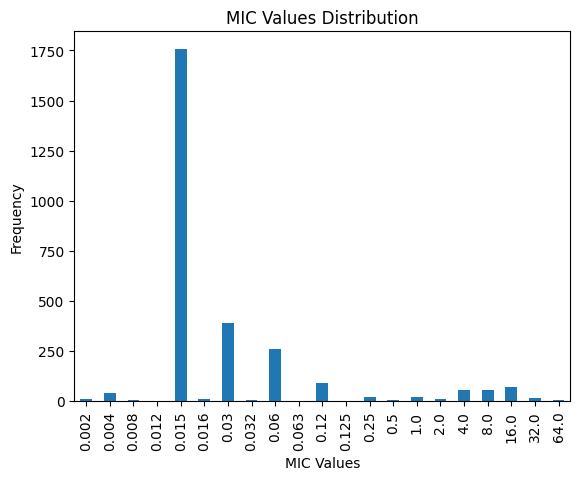

In [244]:
# plot species ditribution
class_counts4.plot(kind='bar')
class_counts4.sort_index(inplace=False)
plt.xlabel('MIC Values')
plt.ylabel('Frequency')
plt.title('MIC Values Distribution')
plt.show()

# Class balance
## 1. Unbalanced

Para aplicar un modelo de Random Forest codificamos todos los valores de la base de datos a números

In [254]:
non_numeric_columns = resis_cipro_L_Train.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['accession', 'genus', 'species', 'phenotype'], dtype='object')


In [261]:
resis_cipro_L_Train.iloc[:, 0:4]

,accession,genus,species,phenotype
0,SRR3138666,Campylobacter,jejuni,Susceptible
1,SRR3138667,Campylobacter,jejuni,Susceptible
2,SRR3138668,Campylobacter,jejuni,Susceptible
3,SRR3138669,Campylobacter,jejuni,Susceptible
4,SRR3138670,Campylobacter,jejuni,Susceptible
...,...,...,...,...
2813,SRR4449966,Salmonella,enterica,Susceptible
2814,SRR4449967,Salmonella,enterica,Susceptible
2815,SRR4449972,Salmonella,enterica,Susceptible
2816,SRR4449973,Salmonella,enterica,Susceptible


In [271]:
# Instancia del codificador
label_encoder = LabelEncoder()

# Inicializa resis_cipro_L_Train_categ_encoded como un DataFrame vacío con las mismas columnas
resis_cipro_L_Train_categ_encoded = pd.DataFrame(index=resis_cipro_L_Train.index, columns=resis_cipro_L_Train.columns)

# Codifica la variable categórica
#for col in [0, 1, 2, 3]:
#    resis_cipro_L_Train_categ_encoded.iloc[:, col] = label_encoder.fit_transform(resis_cipro_L_Train.iloc[:, col])

# Codificar columnas categóricas
for col in [0, 1, 2, 3]:  # Modifica estos índices según lo necesario
    resis_cipro_L_Train_categ_encoded.iloc[:, col] = label_encoder.fit_transform(resis_cipro_L_Train.iloc[:, col].astype(str))


# Convert the NumPy array to a Pandas Series
resis_cipro_L_Train_categ_encoded_series = pd.Series(resis_cipro_L_Train_categ_encoded)
    
# Get the value counts
class_counts5 = resis_cipro_L_Train_categ_encoded_series.value_counts()

print(class_counts5)



ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [264]:
encoded_columns = []
for col in resis_cipro_L_Train.iloc[:, 0:4]:
  # Encode each column and store the result
  encoded_column = label_encoder.fit_transform(col)
  encoded_columns.append(encoded_column)

# Concatenate the encoded columns into a DataFrame (optional)
encoded_df = pd.DataFrame(encoded_columns).T  # Transpose for column-wise data

ValueError: y should be a 1d array, got an array of shape () instead.

In [245]:
# X serán las 5568 columnas (predictoras) y Y serán las columnas objetivo (outputs)
X = resis_cipro_L_Train.iloc[:,[0, 1, 2] + list(range(5, len(resis_cipro_L_Train)))] # columnas predictoras
Y = resis_cipro_L_Train.iloc[:,[3,4]]  # columnas objetivo

# Suponiendo que Y tiene dos columnas, la primera categórica y la segunda continua
Y_categ = Y.iloc[:, -2]  # Categorical Output (phenotype)
Y_continuous = Y.iloc[:, -1]  # Continuous Output (MIC)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_categ_train, Y_categ_test, Y_cont_train, Y_cont_test = train_test_split(X, 
                                                                                           Y_categ, 
                                                                                           Y_continuous, 
                                                                                           test_size=0.2, 
                                                                                           random_state=42)


## 1.1 Random Forest Classifier for Cathegorical output

In [247]:
# Revisa las columnas de X que no son numéricas
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['accession', 'genus', 'species'], dtype='object')


In [252]:
# Instancia del codificador
label_encoder = LabelEncoder()

# Codifica la variable categórica
Y_categ_encoded = label_encoder.fit_transform(Y_categ)

# Convert the NumPy array to a Pandas Series
Y_categ_encoded_series = pd.Series(Y_categ_encoded)

# Get the value counts
class_counts5 = Y_categ_encoded_series.value_counts()

print(class_counts5)

1    2604
0     214
Name: count, dtype: int64


In [253]:
print(X.dtypes)  # Verifica que todas las columnas de X sean numéricas

accession     object
genus         object
species       object
3000535      float64
3005091      float64
              ...   
3005119      float64
3001376      float64
3005548      float64
3002035      float64
3003175      float64
Length: 2816, dtype: object


In [246]:
# Instancia del modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo para la variable categórica
rf_classifier.fit(X_train, Y_categ_train)

ValueError: could not convert string to float: 'SRR3664922'

In [ ]:
# Predicción sobre el conjunto de prueba para la variable categórica
Y_categ_pred = rf_classifier.predict(X_test)

# Evaluar la precisión del modelo de clasificación
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_categ_test, Y_categ_pred)
print(f"Accuracy (categórica): {accuracy}")


Index(['accession', 'genus', 'species'], dtype='object')


## 1.2 Random Forest Classifier for Cathegorical output

In [172]:
# Instancia del modelo
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo para la variable continua
rf_regressor.fit(X_train, Y_cont_train)


ValueError: could not convert string to float: 'SRR3664922'

In [ ]:
# Predicción sobre el conjunto de prueba para la variable continua
Y_cont_pred = rf_regressor.predict(X_test)

# Evaluar el modelo de regresión
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_cont_test, Y_cont_pred)
print(f"MSE (continua): {mse}")


# Bootstrap

In [119]:
resis_cipro_L_Train.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,19.0,10.0,4.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,19.0,6.0,7.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,16.0,7.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,20.0,8.0,6.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
# Calculo de media para las columnas numéricas
resis_cipro_L_Train.iloc[:, 4:].mean()

mic               0.918746
3000535          24.106458
3005091          16.005323
3000833          22.696593
3003665          17.223563
                   ...    
3005106-A352E     0.000000
3003937-N514H     0.000000
3003937-L546V     0.000000
3003304-E540V     0.000000
3003304-E504V     0.000000
Length: 5566, dtype: float64

In [277]:
# Calculo de mediana para las columnas numéricas
resis_cipro_L_Train.iloc[:, 4:].median()

mic               0.015
3000535          25.000
3005091          18.000
3000833          27.000
3003665          21.000
                  ...  
3005106-A352E     0.000
3003937-N514H     0.000
3003937-L546V     0.000
3003304-E540V     0.000
3003304-E504V     0.000
Length: 5566, dtype: float64

In [278]:
# Calculo de desv est para las columnas numéricas
resis_cipro_L_Train.iloc[:, 4:].std()

mic              4.215741
3000535          4.627098
3005091          5.322570
3000833          9.677761
3003665          7.936229
                   ...   
3005106-A352E    0.000000
3003937-N514H    0.000000
3003937-L546V    0.000000
3003304-E540V    0.000000
3003304-E504V    0.000000
Length: 5566, dtype: float64

In [284]:
# Calculo de mínimo y máximo para las columnas numéricas
print(f"mínimo:\n{resis_cipro_L_Train.iloc[:, 4:].min()} \nmáximo:\n{resis_cipro_L_Train.iloc[:, 4:].max()}")

mínimo:
mic               0.002
3000535          12.000
3005091           3.000
3000833           2.000
3003665           2.000
                  ...  
3005106-A352E     0.000
3003937-N514H     0.000
3003937-L546V     0.000
3003304-E540V     0.000
3003304-E504V     0.000
Length: 5566, dtype: float64 
máximo:
mic              64.0
3000535          86.0
3005091          62.0
3000833          83.0
3003665          67.0
                 ... 
3005106-A352E     0.0
3003937-N514H     0.0
3003937-L546V     0.0
3003304-E540V     0.0
3003304-E504V     0.0
Length: 5566, dtype: float64


In [126]:
resis_cipro_L_Train['mic'].mean()

#resis_cipro_L_Train['mic'].sample(n=20, replace=False)

0.9187462739531581

In [128]:
# Bootstrap for mic with mean
mic_value = resis_cipro_L_Train['mic']

means = []

for i in range(100_000):
  sample = mic_value.sample(n=100, replace=True)
  means.append(sample.mean()) # can be more measures like median, sum of values

serie_means = pd.Series(means)
serie_means

0        1.43046
1        0.96568
2        0.74434
3        0.61495
4        0.91270
          ...   
99995    0.56410
99996    1.03359
99997    1.35797
99998    0.66710
99999    0.93369
Length: 100000, dtype: float64

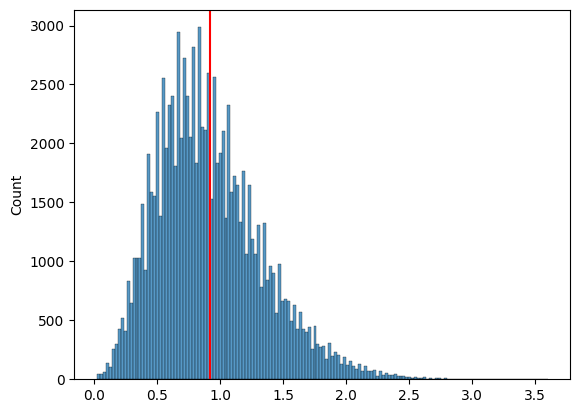

In [129]:
sns.histplot(serie_means)
plt.axvline(resis_cipro_L_Train['mic'].mean(), color='red')

In [168]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

print(f'El intervalo de confianza es de {limite_inferior} a {limite_superior}')

El intervalo de confianza es de 0.26568 a 1.8898804999999996


In [169]:
mic_value.mean()

0.9187462739531581

In [170]:
promedio_de_los_intervalos = ((mic_value.mean() - limite_inferior) + (limite_superior - mic_value.mean())) / 2

print(f'Intervalo de 95% de confianza de la media: {mic_value.mean()} +/- {promedio_de_los_intervalos}')

Intervalo de 95% de confianza de la media: 0.9187462739531581 +/- 0.8121002499999999


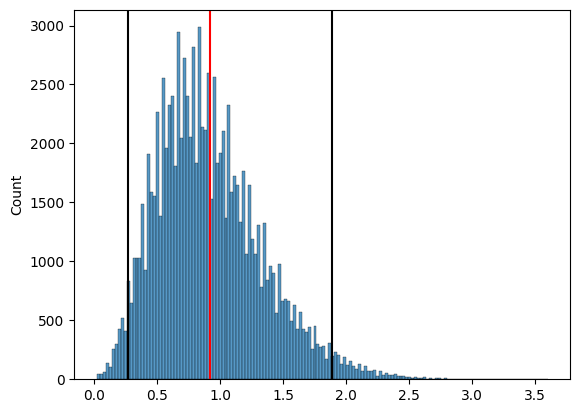

In [171]:
sns.histplot(serie_means)
plt.axvline(resis_cipro_L_Train['mic'].mean(), color='red')
plt.axvline(limite_inferior, color='black')
plt.axvline(limite_superior, color='black')

In [130]:
# Bootstrap for mic with standard deviation
mic_value = resis_cipro_L_Train['mic']

d_est = []

for i in range(100_000):
  sample = mic_value.sample(n=100, replace=True)
  d_est.append(sample.std()) # can be more measures like median, sum of values

serie_d_est = pd.Series(d_est)
serie_d_est

0        4.617055
1        5.126815
2        3.566904
3        2.999129
4        1.783199
           ...   
99995    2.197377
99996    2.738680
99997    3.198126
99998    1.599422
99999    3.710484
Length: 100000, dtype: float64

In [133]:
resis_cipro_L_Train['mic'].std()

4.215740771681975

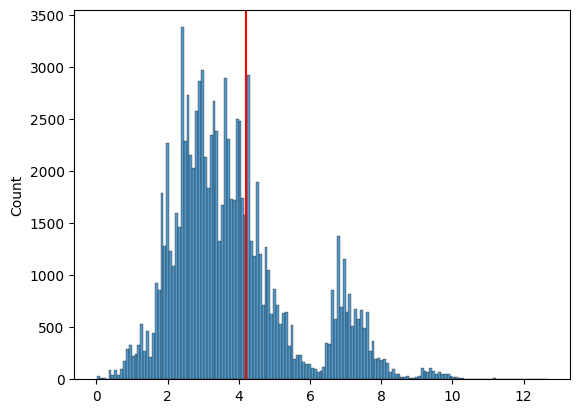

In [134]:
sns.histplot(serie_d_est)
plt.axvline(resis_cipro_L_Train['mic'].std(), color='red')

In [136]:
# Bootstrap with median
mic_value = resis_cipro_L_Train['mic']

medians = []

for i in range(100_000):
  sample = mic_value.sample(n=100, replace=True)
  medians.append(sample.median()) # can be more measures like median, sum of values

serie_medians = pd.Series(medians)
serie_medians

0        0.015
1        0.015
2        0.015
3        0.015
4        0.015
         ...  
99995    0.015
99996    0.015
99997    0.015
99998    0.015
99999    0.015
Length: 100000, dtype: float64

In [137]:
resis_cipro_L_Train['mic'].median()

0.015

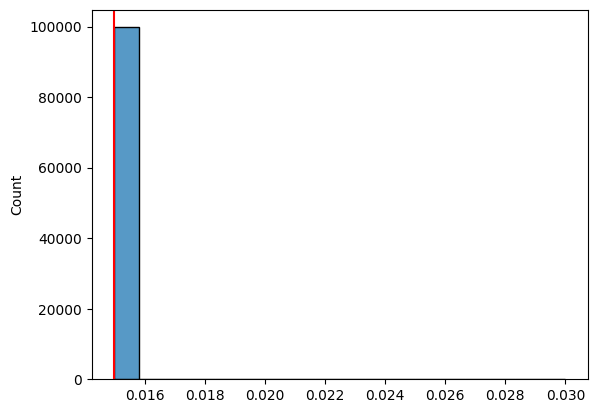

In [156]:
sns.histplot(serie_medians)
plt.axvline(resis_cipro_L_Train['mic'].median(), color='red')

In [147]:
resis_cipro_L_Train['mic'].max()

64.0

In [148]:
resis_cipro_L_Train['mic'].min()

0.002

(0.0, 0.25)

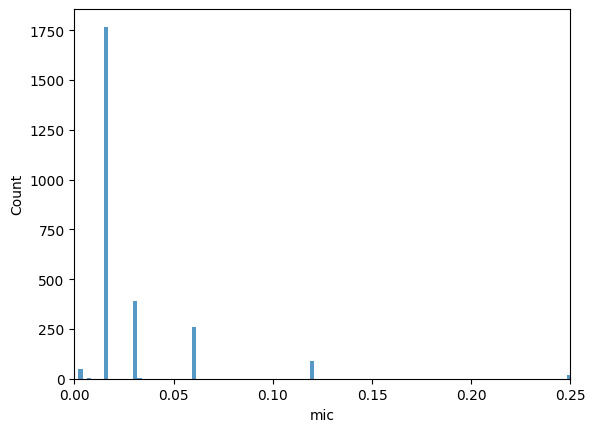

In [149]:
sns.histplot(resis_cipro_L_Train['mic'])
plt.xlim(0, 0.25)


In [144]:
#sns.histplot?

<Axes: ylabel='mic'>

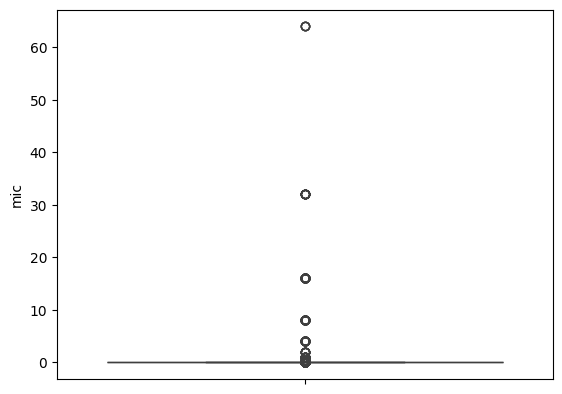

In [153]:
sns.boxplot(resis_cipro_L_Train['mic'])
#plt.ylim(0, 0.25)

In [173]:
#resis_cipro_L_Train['mic'].tail(20)

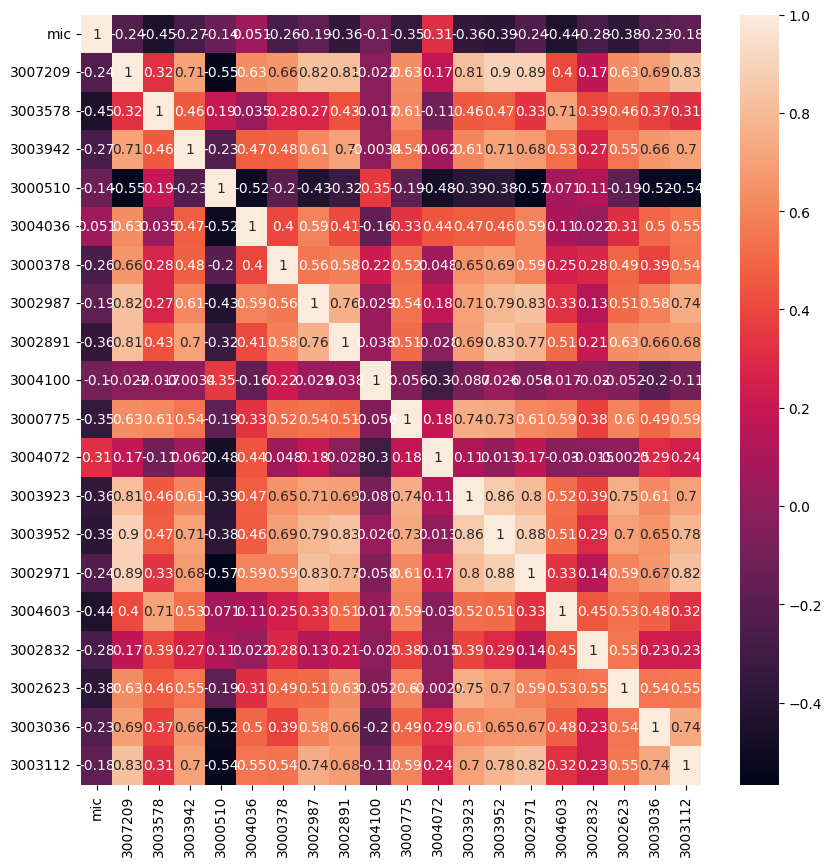

In [191]:
# Select columns from index 4 to 14 (inclusive)
selected_columns = resis_cipro_L_Train.iloc[:, [4] + list(range(41, 60))]
#resis_cipro_L_Train.iloc[:,[0, 1, 2] + list(range(5, len(resis_cipro_L_Train)))]

# Create the heatmap using correlation matrix
corr_matrix = selected_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [194]:
# Ahora voy a entrenar un modelo de Regresión Lineal Múltiple, porque tengo más de 1 variable independiente

X = resis_cipro_L_Train['3004072'] # independientes
y = resis_cipro_L_Train['mic'] # dependiente

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 0.2 significa que el 20% de mis datos se va
# para test. Por lo tanto, el 80% se va a para train.

In [199]:
# Assuming X_train is a Series
X_train_2d = X_train.reshape(-1, 1)  # Reshape to a 2D array with one column


model = LinearRegression()
model.fit(X_train_2d, y_train)

AttributeError: 'Series' object has no attribute 'reshape'

# Ciprofloxacin Resistance Strict Database

In [25]:
# Ciprofloxacin Strict Resistance database
resis_cipro_S.head()

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,SRR3138666,Campylobacter,jejuni,Susceptible,0.12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SRR3138667,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SRR3138668,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SRR3138669,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SRR3138670,Campylobacter,jejuni,Susceptible,0.06,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meropenem Resistance Loose Database

In [26]:
# Meropenem Loose Resistance database
resis_mero_L.head()

,accession,genus,species,phenotype,mic,3000535,3005091,3000833,3003665,3007433,...,3003285-S531G,3007051-I572F,3007051-I837V,3003294-D105E,3003394-S66P,3005106-A352E,3003937-N514H,3003937-L546V,3003304-E540V,3003304-E504V
0,GCA_002947415,Acinetobacter,baumannii,Resistant,8.0,20.0,7.0,19.0,19.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,8.0,18.0,7.0,18.0,18.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,8.0,19.0,6.0,15.0,18.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,8.0,18.0,7.0,19.0,18.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,8.0,20.0,8.0,17.0,21.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Meropenem Resistance Strict Database

In [29]:
# Meropenem Strict Resistance database
resis_mero_S.head()

,accession,genus,species,phenotype,mic,3005053,3000830,3003838,3000508,3003890,...,3007751-D87Y,3003926-D87Y,3003709-G46S,3004851-A39T,3004832-A501P,3003381-R20H,3003926-S83I,3003381-G121D,3004832-T483S,3004832-A311V
0,GCA_002947415,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GCA_002947845,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GCA_002948925,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GCA_002996805,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GCA_003006035,Acinetobacter,baumannii,Resistant,8.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
